<a href="https://colab.research.google.com/github/yasservision24/Brain-MRI-scans-classification-for-tumor/blob/main/Brain_MRI_scans_classification_for_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.utils import normalize
from PIL import Image
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation,Dropout,Flatten,Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split

In [1]:
from google.colab import files

# Upload a single file
uploaded = files.upload()

# Access the uploaded file
for filename, content in uploaded.items():
    print(f"Uploaded file: {filename}, File content: {content[:100]}")  # Print the first 100 characters of the file content


Saving kaggle.json to kaggle.json
Uploaded file: kaggle.json, File content: b'{"username":"yasservision24","key":"c9c1ba72e0a3f04487cfd8d19ade0292"}'


In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d ahmedhamada0/brain-tumor-detection

 87% 73.0M/84.0M [00:00<00:00, 79.0MB/s]
100% 84.0M/84.0M [00:01<00:00, 86.8MB/s]


In [ ]:
!unzip /content/brain-tumor-detection.zip

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2
import os

In [7]:
positive=os.listdir("/content/yes")
negative=os.listdir("/content/no")
print(positive)
print(negative)

['y902.jpg', 'y854.jpg', 'y1459.jpg', 'y451.jpg', 'y762.jpg', 'y639.jpg', 'y308.jpg', 'y718.jpg', 'y173.jpg', 'y462.jpg', 'y719.jpg', 'y979.jpg', 'y680.jpg', 'y1259.jpg', 'y359.jpg', 'y607.jpg', 'y908.jpg', 'y1036.jpg', 'y907.jpg', 'y558.jpg', 'y1443.jpg', 'y993.jpg', 'y207.jpg', 'y1303.jpg', 'y306.jpg', 'y1474.jpg', 'y484.jpg', 'y742.jpg', 'y1316.jpg', 'y724.jpg', 'y364.jpg', 'y300.jpg', 'y637.jpg', 'y1230.jpg', 'y871.jpg', 'y612.jpg', 'y116.jpg', 'y1133.jpg', 'y581.jpg', 'y342.jpg', 'y547.jpg', 'y1336.jpg', 'y1085.jpg', 'y178.jpg', 'y851.jpg', 'y270.jpg', 'y414.jpg', 'y643.jpg', 'y453.jpg', 'y425.jpg', 'y834.jpg', 'y760.jpg', 'y1345.jpg', 'y1489.jpg', 'y545.jpg', 'y481.jpg', 'y949.jpg', 'y710.jpg', 'y691.jpg', 'y1212.jpg', 'y794.jpg', 'y1451.jpg', 'y405.jpg', 'y660.jpg', 'y531.jpg', 'y813.jpg', 'y179.jpg', 'y681.jpg', 'y465.jpg', 'y695.jpg', 'y1384.jpg', 'y869.jpg', 'y206.jpg', 'y1308.jpg', 'y1202.jpg', 'y402.jpg', 'y310.jpg', 'y985.jpg', 'y330.jpg', 'y1081.jpg', 'y961.jpg', 'y256.jp

Some sample MRI images Images


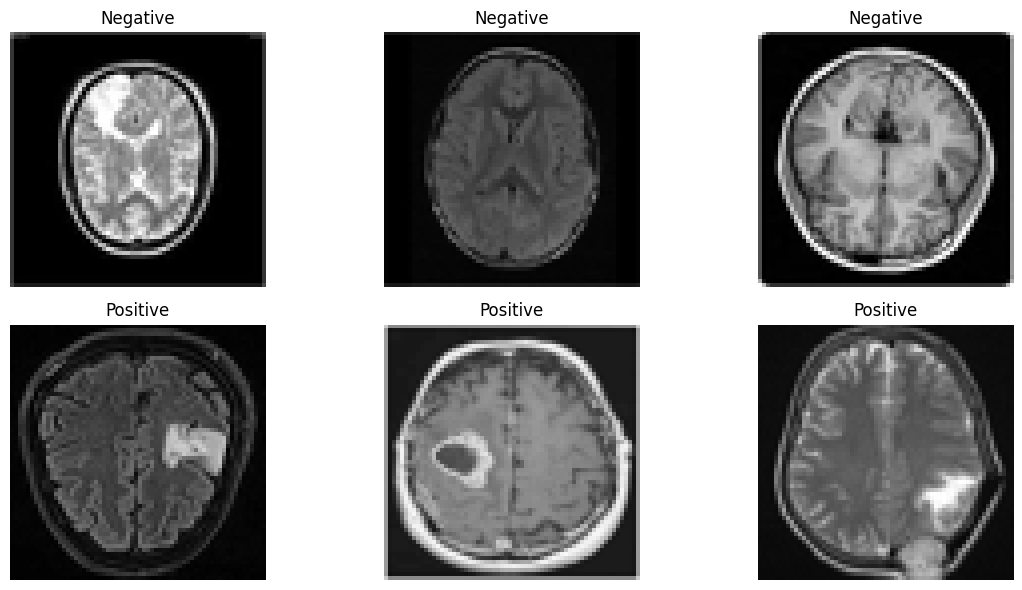

In [29]:
from PIL import Image
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

features = []
labels = []

positive_dir = "/content/yes"
negative_dir = "/content/no"

for j in os.listdir(negative_dir):
    img_path = os.path.join(negative_dir, j)
    img = cv2.imread(img_path)
    img = Image.fromarray(img, "RGB")
    img = img.resize((64, 64))
    features.append(np.array(img))
    labels.append(0)

for j in os.listdir(positive_dir):
    img_path = os.path.join(positive_dir, j)
    img = cv2.imread(img_path)
    img = Image.fromarray(img, "RGB")
    img = img.resize((64, 64))
    features.append(np.array(img))
    labels.append(1)

features = np.array(features)
labels = np.array(labels)

plt.figure(figsize=(12, 6))

for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(features[i+1497])
    if labels[i+1497] == 0:
        plt.title("Negative")
    else:
        plt.title("Positive")
    plt.axis('off')

print("Some sample MRI images Images")
plt.tight_layout()
plt.show()


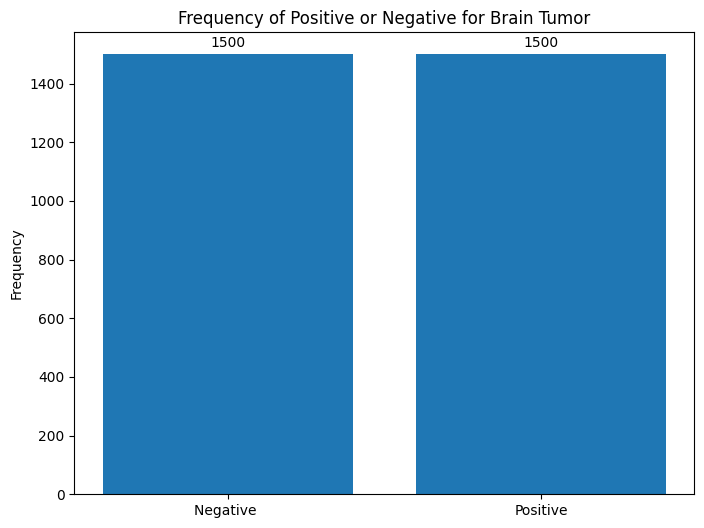

In [30]:
unique, counts = np.unique(labels, return_counts=True)
plt.figure(figsize=(8, 6))
bars=plt.bar(unique, counts)
plt.title('Frequency of Positive or Negative for Brain Tumor')
x_labels = ['Negative ', 'Positive']
plt.ylabel('Frequency')
plt.xticks(unique, x_labels)
for bar in bars:
    height = bar.get_height()
    plt.annotate('{}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')
plt.show()




In [33]:
features=np.array(features)
labels=np.array(labels)

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(features,labels, test_size=0.2, random_state=2)


In [37]:
scaler = StandardScaler()
X_train_std = X_train/255
X_test_std = X_test/255
tf.random.set_seed(3)


In [38]:
  model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(64,64,3)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

In [39]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=50)

Epoch 1/50
68/68 [==============================] - 2s 12ms/step - loss: 0.5536 - accuracy: 0.7370 - val_loss: 0.5482 - val_accuracy: 0.7750
Epoch 2/50
68/68 [==============================] - 1s 8ms/step - loss: 0.4850 - accuracy: 0.7778 - val_loss: 0.4625 - val_accuracy: 0.7792
Epoch 3/50
68/68 [==============================] - 1s 7ms/step - loss: 0.4149 - accuracy: 0.8190 - val_loss: 0.3570 - val_accuracy: 0.8542
Epoch 4/50
68/68 [==============================] - 1s 8ms/step - loss: 0.3475 - accuracy: 0.8620 - val_loss: 0.4520 - val_accuracy: 0.7958
Epoch 5/50
68/68 [==============================] - 1s 8ms/step - loss: 0.2955 - accuracy: 0.8759 - val_loss: 0.3170 - val_accuracy: 0.8833
Epoch 6/50
68/68 [==============================] - 1s 8ms/step - loss: 0.2500 - accuracy: 0.9005 - val_loss: 0.3092 - val_accuracy: 0.8667
Epoch 7/50
68/68 [==============================] - 1s 8ms/step - loss: 0.2039 - accuracy: 0.9250 - val_loss: 0.3818 - val_accuracy: 0.8167
Epoch 8/50
68/68 [=

In [40]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(accuracy)

19/19 [==============================] - 0s 2ms/step - loss: 0.2983 - accuracy: 0.9667
0.9666666388511658


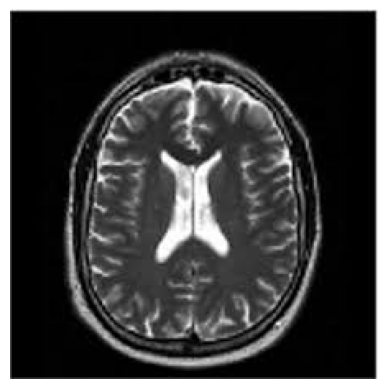

1/1 [==============================] - 0s 22ms/step
 MRI scan is NEGATIVE for tumor with probability: 0.4182


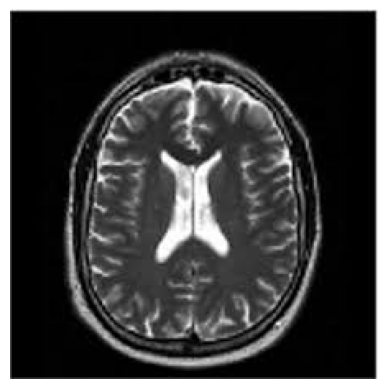

1/1 [==============================] - 0s 22ms/step
 MRI scan is NEGATIVE for tumor with probability: 0.9996


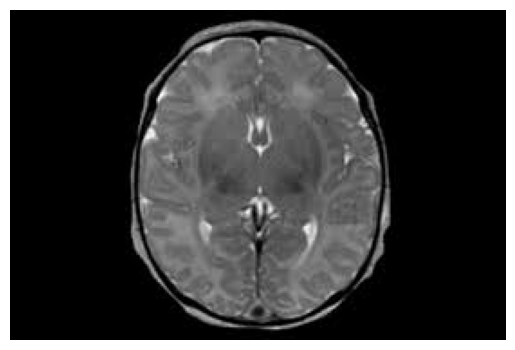

1/1 [==============================] - 0s 20ms/step
 MRI scan is POSITIVE for tumor with probability: 0.9947


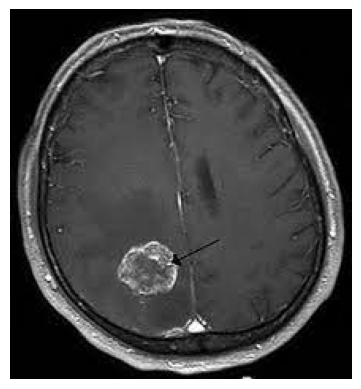

In [70]:
# Preprocess the input image
def preprocess_input_image(image_path):
    img = Image.open(image_path)
    img = img.resize((64, 64))  # Resize to the same size used during training
    img_array = np.array(img)
    img_array = img_array / 255.0  # Normalize pixel values to [0, 1]
    return img_array

# Here I am Provide the path to new MRI image here
# Or you can remove loop to give your new MRI image
for i in range(1, 4):
    input_image_path = f"/content/REAL DATA/MRI SCAN_0{str(i)}.jpeg"

    #  Make predictions on the new image
    # Preprocess the input image
    input_image = preprocess_input_image(input_image_path)

    # Add batch dimension to match the model's input shape
    input_image = np.expand_dims(input_image, axis=0)

    # Make prediction
    prediction_probs = model.predict(input_image)[0]

    # Get the predicted class (0 or 1) and probability
    predicted_class = np.argmax(prediction_probs)
    predicted_probability = prediction_probs[predicted_class]

    # Display the image
    img = Image.open(input_image_path)
    plt.imshow(img)
    plt.axis('off')

    # Display prediction results
    if predicted_class == 0:
        print(f' MRI scan is NEGATIVE for tumor with probability: {predicted_probability:.4f}')
    else:
        print(f' MRI scan is POSITIVE for tumor with probability: {predicted_probability:.4f}')

    plt.show()  # Show the image with prediction in each iteration
